In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use("dark_background")

## 1. Convergence Paths Plot

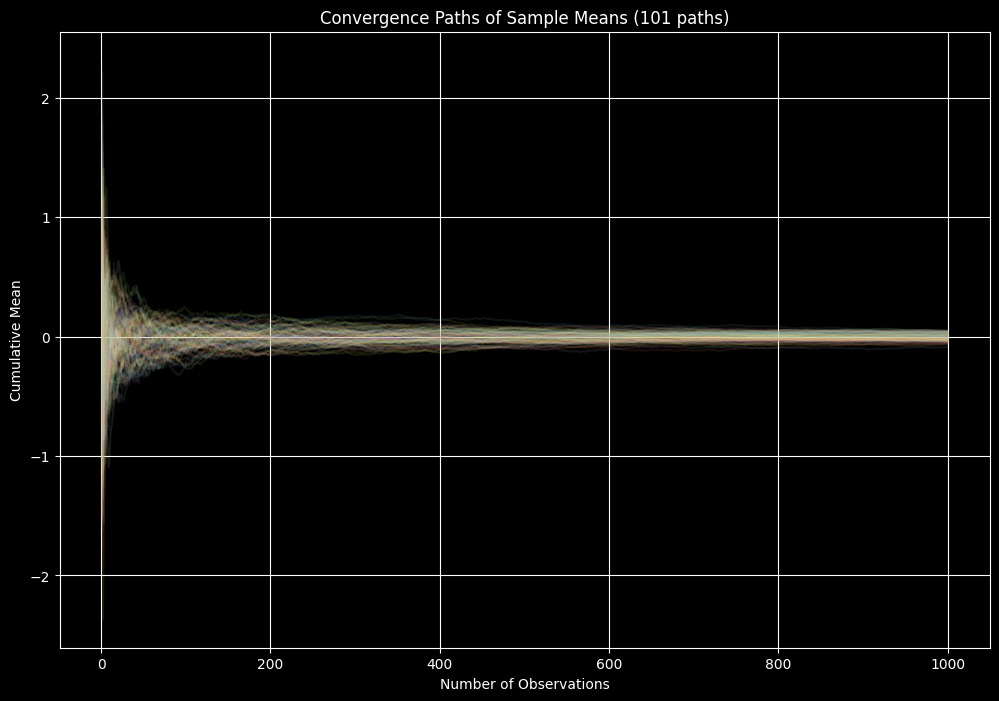

In [2]:
# Generate data and create convergence paths
n_points = 1000 
n_paths = 101 

# Create figure
plt.figure(figsize=(12, 8))
# EAR you should be able to do this entire question 
# with zero Python for loops
# Generate and plot multiple convergence paths
for _ in range(n_paths):
    # Generate random data
    data = np.random.normal(0, 1, n_points)
    
    # Calculate cumulative means
    cumulative_means = np.cumsum(data) / np.arange(1, len(data) + 1)
    
    # Plot with transparency
    plt.plot(range(1, n_points + 1), cumulative_means, alpha=0.1)

plt.title(f'Convergence Paths of Sample Means ({n_paths} paths)')
plt.xlabel('Number of Observations')
plt.ylabel('Cumulative Mean')
plt.grid(True)
plt.show()

## 2. Binomial Distribution Analysis

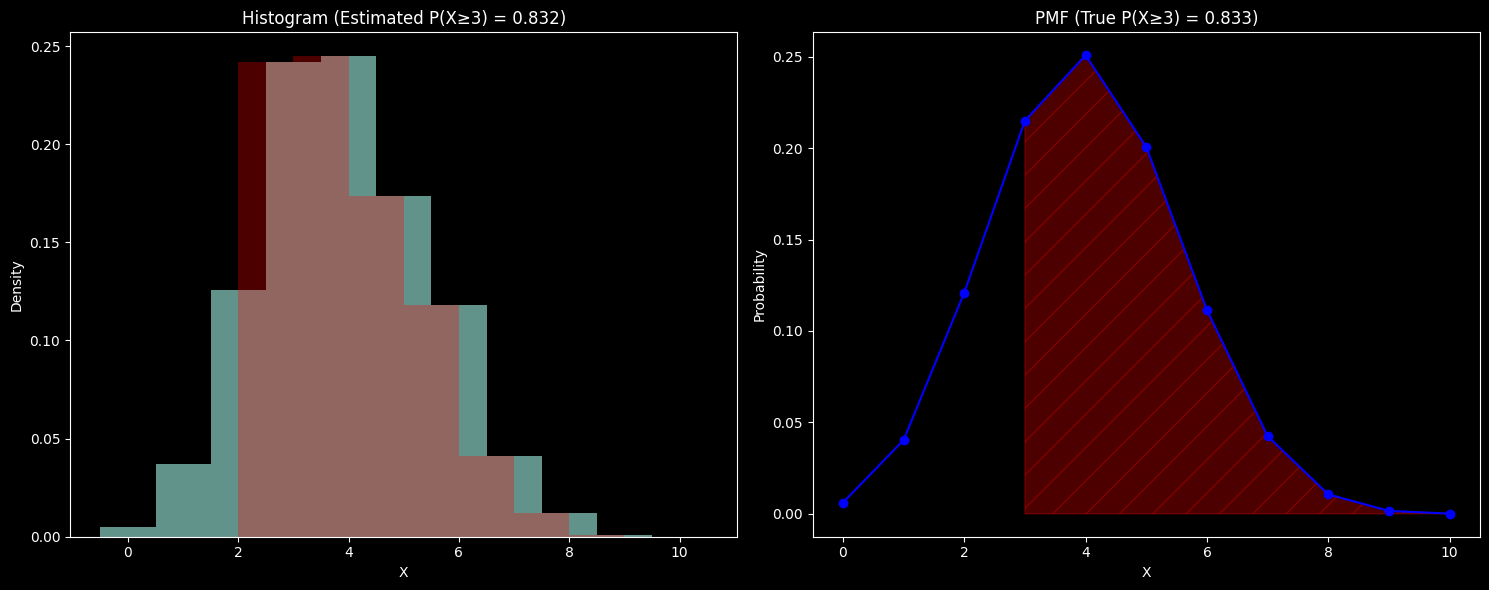

In [3]:
# Generate binomial random variables
n = 10 
p = 0.4
size = 1001


data = np.random.binomial(n, p, size)


estimated_prob = np.mean(data >= 3)


true_prob = 1 - stats.binom.cdf(2, n, p)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


bins = np.arange(-0.5, n + 1.5)
hist = ax1.hist(data, bins=bins, density=True, alpha=0.7)


for i in range(len(hist[0])):
    if bins[i] >= 2.5: 
        ax1.bar(hist[1][i], hist[0][i], width=1, alpha=0.3, color='red')

ax1.set_title(f'Histogram (Estimated P(X≥3) = {estimated_prob:.3f})')
ax1.set_xlabel('X')
ax1.set_ylabel('Density')

x = np.arange(0, n + 1)
pmf = stats.binom.pmf(x, n, p)
ax2.plot(x, pmf, 'b-', marker='o')


x_shade = x[x >= 3]
y_shade = pmf[x >= 3]
ax2.fill_between(x_shade, y_shade, alpha=0.3, color='red', hatch='/')
# EAR there no probability between integers for the
# Binomial distribution, so technically even the lines
# connecting the dots are wrong

ax2.set_title(f'PMF (True P(X≥3) = {true_prob:.3f})')
ax2.set_xlabel('X')
ax2.set_ylabel('Probability')

plt.tight_layout()
plt.show()

## 3. Distribution Analysis

For this analysis, let's use a Gamma distribution with shape parameter α=2 and scale parameter θ=3.

In [4]:
#Calculate true mean and variance
alpha = 2 
theta = 3

true_mean = alpha * theta 
true_var = alpha * theta**2 

print(f"True mean: {true_mean}")
print(f"True variance: {true_var}")

True mean: 6
True variance: 18


In [5]:
#Generate samples and calculate estimates
R = 501  
N = 1001  


samples = np.random.gamma(alpha, theta, size=(R, N))

# Calculate estimates
mean_estimates = np.mean(samples, axis=1)
var_estimates_ddof0 = np.var(samples, axis=1, ddof=0)
var_estimates_ddof1 = np.var(samples, axis=1, ddof=1)

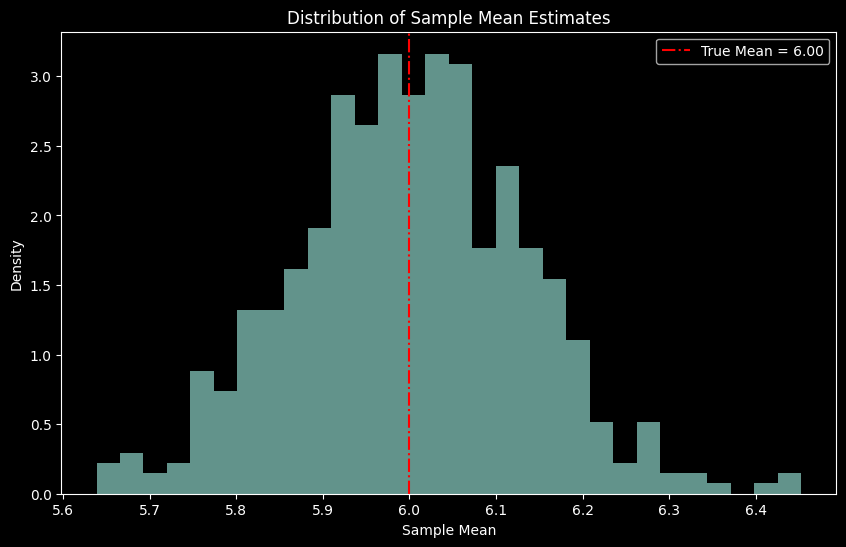

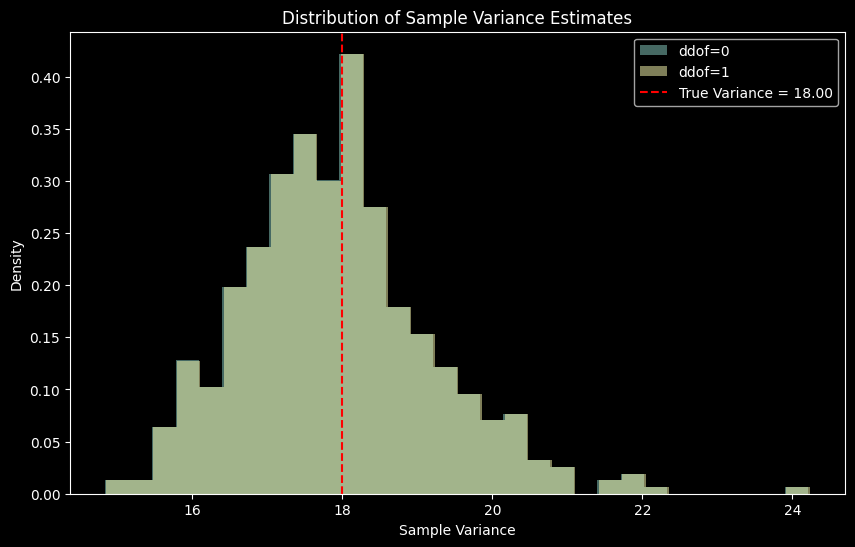

In [6]:
# 3.3 Create plots
# Plot for mean estimates
plt.figure(figsize=(10, 6))
plt.hist(mean_estimates, bins=30, density=True, alpha=0.7)
plt.axvline(true_mean, color='r', linestyle='-.', label=f'True Mean = {true_mean:.2f}')
plt.title('Distribution of Sample Mean Estimates')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.legend()
plt.show()

# Plot for variance estimates
plt.figure(figsize=(10, 6))
plt.hist(var_estimates_ddof0, bins=30, alpha=0.5, label='ddof=0', density=True)

# EAR use histtype = "step" so as to not hide the 
# histogram in the background

plt.hist(var_estimates_ddof1, bins=30, alpha=0.5, label='ddof=1', density=True)
plt.axvline(true_var, color='r', linestyle='--', label=f'True Variance = {true_var:.2f}')
plt.title('Distribution of Sample Variance Estimates')
plt.xlabel('Sample Variance')
plt.ylabel('Density')
plt.legend()
plt.show()

### 3.4 Analysis of Variance Estimates

The key differences between the two variance estimates are:

1. The variance estimate with ddof=0 (population variance) tends to be slightly smaller than the estimate with ddof=1 (sample variance).
2. The ddof=1 estimate is less biased and centers more closely around the true variance.
3. This difference occurs because ddof=1 uses (n-1) in the denominator (Bessel's correction) instead of n, which corrects for the bias in the sample variance estimate.